# 💹 리튬 ETF 주가 확인


In [1]:
import yfinance as yf
import pandas as pd

# 금 가격
gold_ticker = 'GLD'
g_df = yf.download(gold_ticker, start='2013-01-01')['Adj Close'].round(4)



# 리튬 ETF
lithium_ticker = 'LIT'
l_df = yf.download(lithium_ticker, start='2013-01-01')['Adj Close'].round(4)

# 데이터프레임 합치기
c_df = pd.DataFrame({
    'Gold': g_df,
    'Lithium': l_df
})

# 데이터프레임 확인
c_df.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Gold,Lithium
Date,,
2013-01-02,163.17,25.6669
2013-01-03,161.20,25.5802
2013-01-04,160.44,25.6149
2013-01-07,159.43,25.6843
2013-01-08,160.56,25.4935


In [2]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']
pre_g_df = pd.DataFrame(g_df)
pre_g_df.columns = ['Gold']

In [3]:
pre_l_df

,Lithium
Date,
2013-01-02,25.6669
2013-01-03,25.5802
2013-01-04,25.6149
2013-01-07,25.6843
2013-01-08,25.4935
...,...
2024-06-10,42.8400
2024-06-11,42.3000
2024-06-12,42.3500


# 금 ETF 주가와 리튬 ETF 그래프 확인

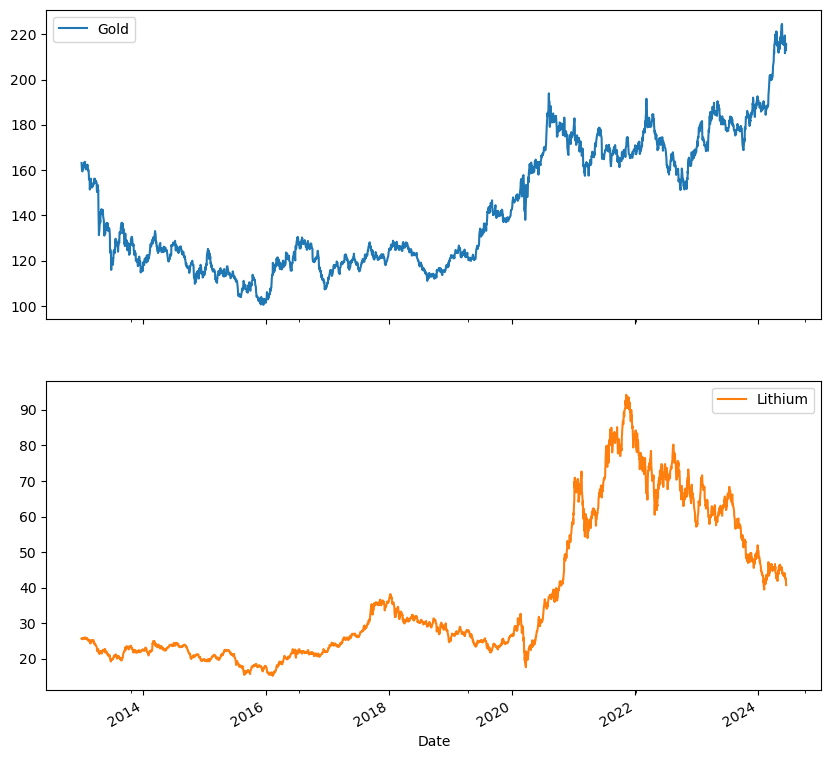

In [4]:
import matplotlib.pyplot as plt

c_df.plot(figsize=(10, 10), subplots = True)
plt.show()

- 10년간 금과 리튬의 가격을 봤을 때 리튬이온베터리가 상대적으로 특정 시점에 가격이 많이 오른 것으로 보이나 현재는 하락세를 보이고 있기 때문에  
  우연변동데이터로 파악된다.

# 해당 근거를 확인하기 위해 ar을 확인해보도록 한다.

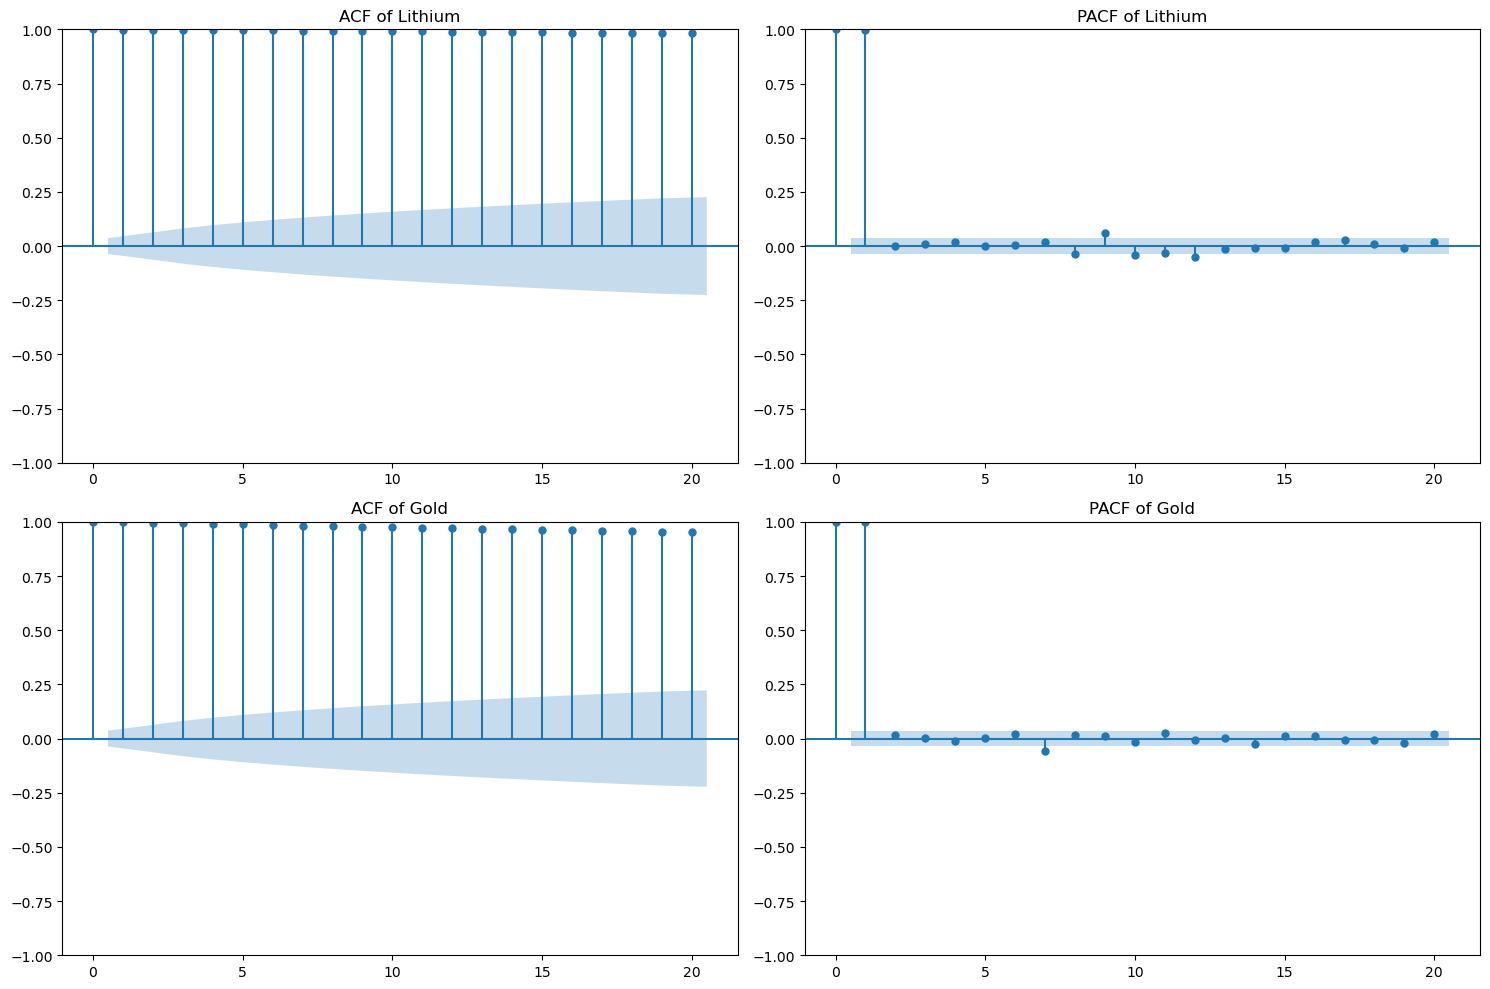

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# 그래프의 행, 열 및 크기 조절
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# l_df에 대한 ACF와 PACF 플롯
plot_acf(l_df, lags=20, ax=ax[0][0])
ax[0][0].set_title('ACF of Lithium')

plot_pacf(l_df, lags=20, ax=ax[0][1])
ax[0][1].set_title('PACF of Lithium')

# g_df에 대한 ACF와 PACF 플롯
plot_acf(g_df, lags=20, ax=ax[1][0])
ax[1][0].set_title('ACF of Gold')

plot_pacf(g_df, lags=20, ax=ax[1][1])
ax[1][1].set_title('PACF of Gold')

# 레이아웃 조절
plt.tight_layout()
plt.show()

## 금과 리튬 모두 추세를 acf 그래프를 확인했을 때 추세를 보이고 있으며 비정상 시계열 데이터임을 확인할 수 있다.

## 실제 변화율을 확인해보도록 하겠다.

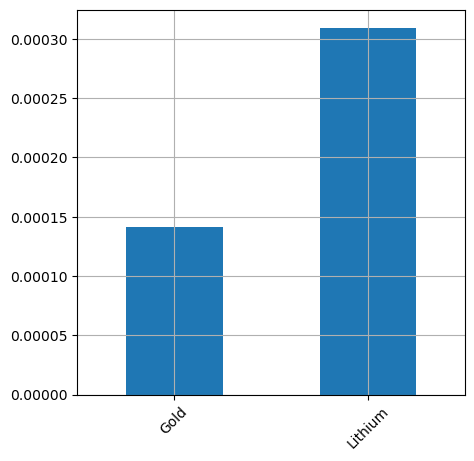

In [5]:
# 변화율! 확인
c_df.pct_change().mean().plot(kind='bar',figsize=(5,5), grid=True)
plt.xticks(rotation=45)
plt.show()

In [6]:
import numpy as np

# 수익률 df
# 수익률의 경우 다음날과 비교하여 전날의 수익률을 나눠야 하기 때문에 해당 공식을 사용
rate_c_df = np.log(c_df / c_df.shift(1))
rate_c_df

,Gold,Lithium
Date,,
2013-01-02,NaN,NaN
2013-01-03,-0.012147,-0.003384
2013-01-04,-0.004726,0.001356
2013-01-07,-0.006315,0.002706
2013-01-08,0.007063,-0.007456
...,...,...
2024-06-10,0.009126,0.003976
2024-06-11,0.002853,-0.012685
2024-06-12,0.002658,0.001181


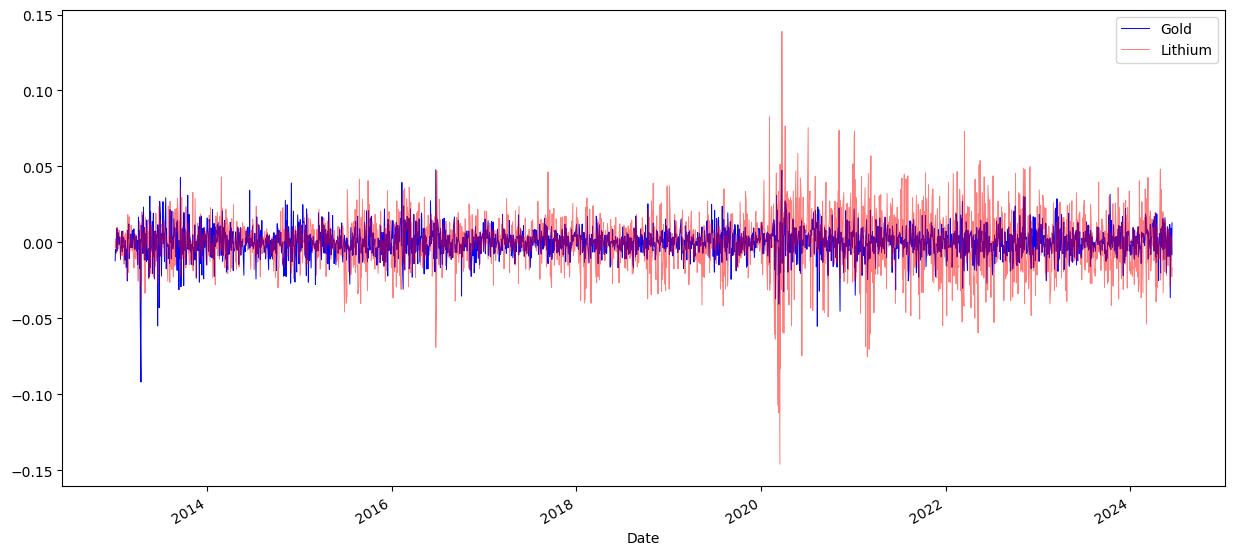

In [7]:
import numpy as np


# 일간 수익률
fig, ax = plt.subplots(figsize=(15, 7))
rate_c_df['Gold'].plot(ax=ax, lw=0.7, color='blue', label='Gold')
rate_c_df['Lithium'].plot(ax=ax, lw=0.7, color='red', alpha=0.5, label='Lithium')  # 투명도 조절
ax.legend()
plt.show()

## 금의 분포보다 리튬의 분포가 더 큰것을 확인할 수 있다.

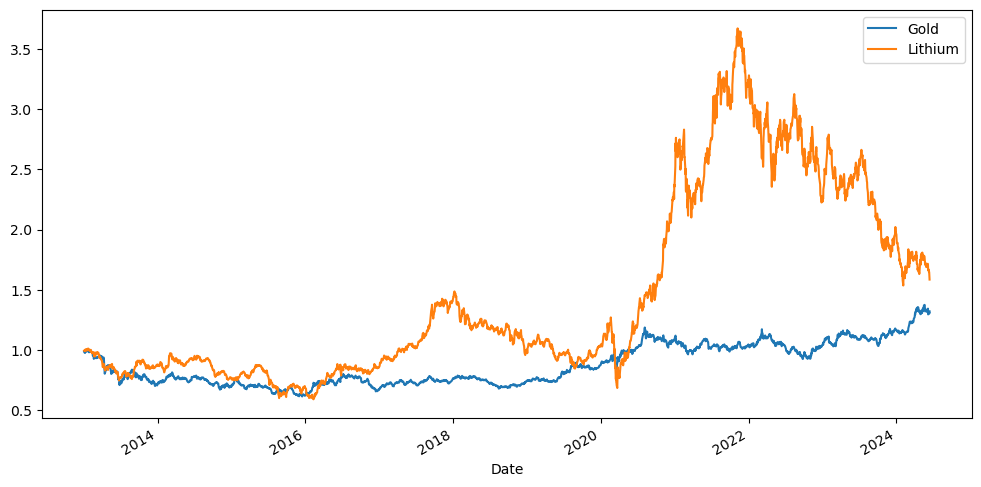

In [8]:
# 각 원소들의 누적합 : cumsum()
# 일간 수익률
rate_c_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

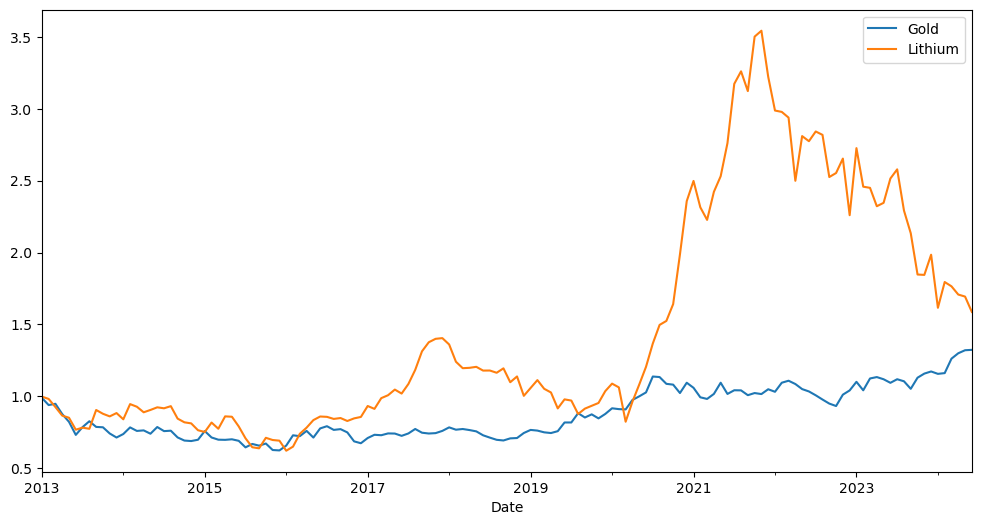

In [9]:
# 월간 수익률
# - 조금 더 스무스한 경향을 확인할 수 있다.
rate_c_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

# 리튬에 대하여 골든크로스와 데드크로스 부분을 확인한다.

In [10]:
window = 20

pre_l_df['min'] = pre_l_df['Lithium'].rolling(window=window).min()
pre_l_df['mean'] = pre_l_df['Lithium'].rolling(window=window).mean()
pre_l_df['std'] = pre_l_df['Lithium'].rolling(window=window).std()
pre_l_df['median'] = pre_l_df['Lithium'].rolling(window=window).median()
pre_l_df['max'] = pre_l_df['Lithium'].rolling(window=window).max()

pre_l_df = pre_l_df.dropna()
pre_l_df

,Lithium,min,mean,std,median,max
Date,,,,,,
2013-01-30,25.5802,25.4935,25.716350,0.140031,25.6843,26.0138
2013-01-31,25.5802,25.4935,25.712015,0.142954,25.6843,26.0138
2013-02-01,25.7363,25.4935,25.719820,0.139600,25.7016,26.0138
2013-02-04,25.5455,25.4935,25.716350,0.143163,25.7016,26.0138
2013-02-05,25.7363,25.4935,25.718950,0.143022,25.7276,26.0138
...,...,...,...,...,...,...
2024-06-10,42.8400,42.6700,44.294000,0.945512,44.0550,45.8000
2024-06-11,42.3000,42.3000,44.152500,1.022447,43.9700,45.8000
2024-06-12,42.3500,42.3000,43.980500,1.021827,43.8800,45.8000


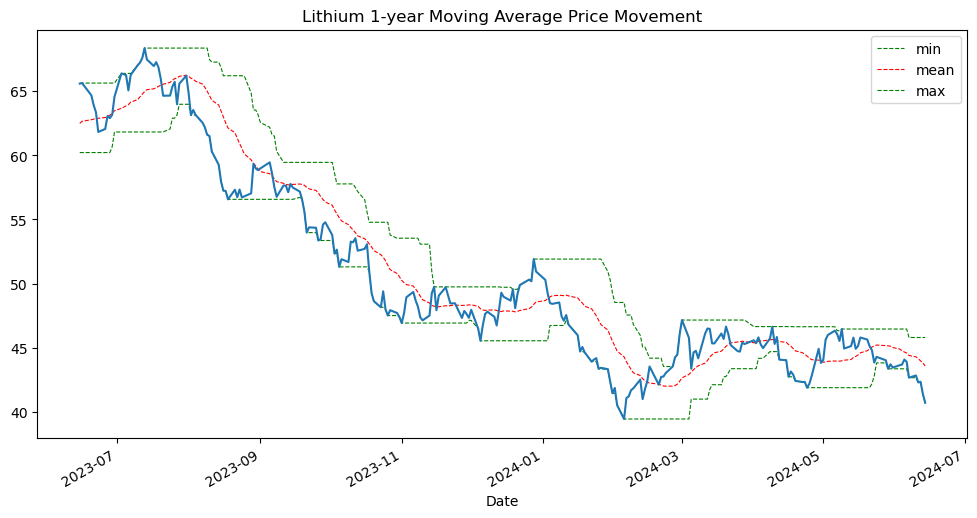

In [11]:
import matplotlib.pyplot as plt

ax = pre_l_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize= (12, 6), style=['g--','r--','g--'], lw=0.8)
pre_l_df['Lithium'].iloc[-252:].plot(ax=ax)
plt.title("Lithium 1-year Moving Average Price Movement")
plt.show()

In [12]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
pre_l_df['SMA1'] = pre_l_df['Lithium'].rolling(window=21).mean() #short-term
# 장기
pre_l_df['SMA2'] = pre_l_df['Lithium'].rolling(window=252).mean() #long-term

pre_l_df[['Lithium', 'SMA1', 'SMA2']].tail()

,Lithium,SMA1,SMA2
Date,,,
2024-06-10,42.84,44.324762,50.867300
2024-06-11,42.30,44.199048,50.785267
2024-06-12,42.35,44.066667,50.701743
2024-06-13,41.40,43.857619,50.609697
2024-06-14,40.71,43.657143,50.516131


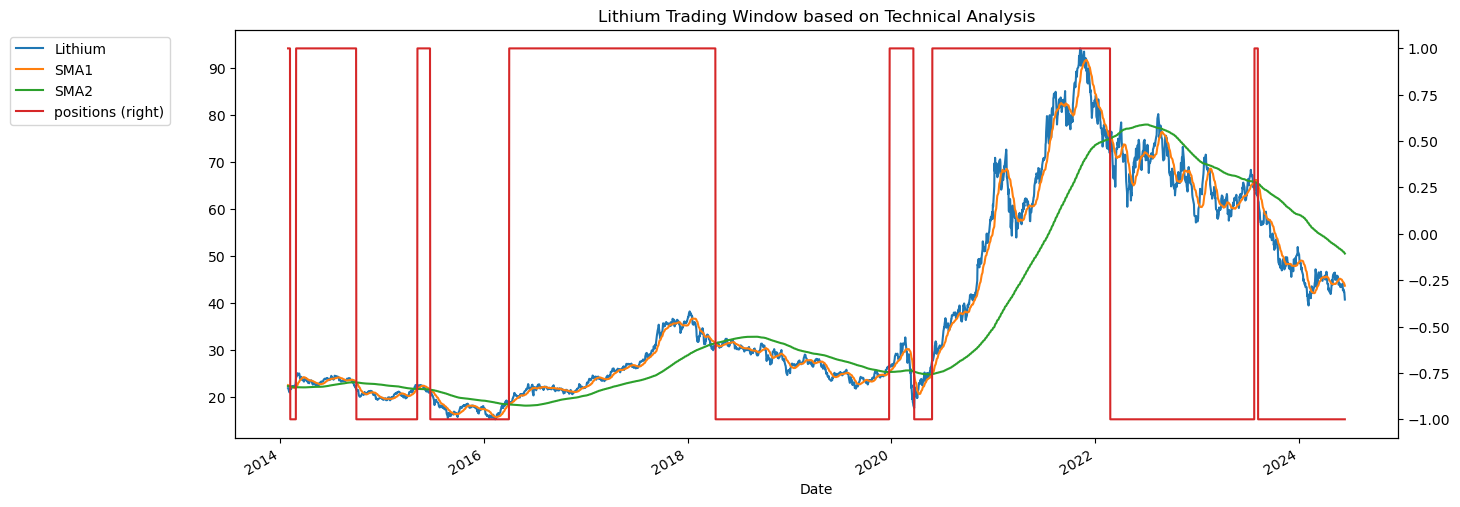

In [13]:
# 골든 크로스, 데드 크로스 확인

pre_l_df.dropna(inplace=True)

pre_l_df['positions'] = np.where(pre_l_df['SMA1'] > pre_l_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = pre_l_df[['Lithium', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("Lithium Trading Window based on Technical Analysis")
plt.show()

### 현재 리튬 주가의 가격은 2020년 이전과 이후에 대하여 큰 차이를 보이고 있으며 추세가 아닌 shock로 판단하여 날짜를 분리하여 추가 분석 진행하도록 하겠습니다.

In [7]:
l_df['2020':]
l_df[:'2019']

Date
2013-01-02    25.6669
2013-01-03    25.5802
2013-01-04    25.6149
2013-01-07    25.6843
2013-01-08    25.4935
               ...   
2019-12-24    26.4680
2019-12-26    26.5930
2019-12-27    26.4391
2019-12-30    26.4022
2019-12-31    26.5576
Name: Adj Close, Length: 1762, dtype: float64

In [ ]:
after_l_df = pd.DataFrame(l_df['2020':])
after_l_df.columns = ['Lithium']

before_l_df = pd.DataFrame(l_df[:'2019'])
before_l_df.columns = ['Lithium']

In [ ]:
y_train = pre_l_df['Lithium'][:int(0.8 * len(pre_l_df))]
y_test = pre_l_df['Lithium'][int(0.8 * len(pre_l_df)):]

In [ ]:
y_train.plot()
y_test.plot()

## 비정상 시계열 데이터이기 때문에 auto arima를 이용하여 정상 시계열 데이터 변경 후 모델 평가

In [14]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']

In [15]:
y_train = pre_l_df['Lithium'][:int(0.8 * len(pre_l_df))]
y_test = pre_l_df['Lithium'][int(0.8 * len(pre_l_df)):]

<Axes: xlabel='Date'>

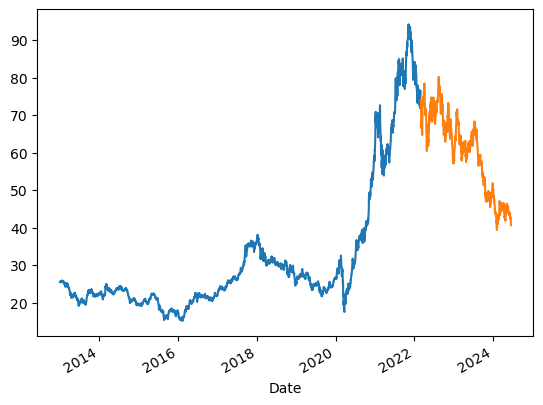

In [16]:
y_train.plot()
y_test.plot()

In [17]:
from pmdarima.arima import ndiffs

# KPSS(Kwiatkowski-Phillips-Schmidt-Shin) 테스트를 통해 차분이 필요한 횟수 계산
# alpha=0.05: 유의수준 5%, max_d=6: 최대 차분 횟수는 6
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)

# ADF(Augmented Dickey-Fuller) 테스트를 통해 차분이 필요한 횟수 계산
# alpha=0.05: 유의수준 5%, max_d=6: 최대 차분 횟수는 6
adf_diff = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)

# PP(Phillips-Perron) 테스트를 통해 차분이 필요한 횟수 계산
# alpha=0.05: 유의수준 5%, max_d=6: 최대 차분 횟수는 6
pp_diff = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

# 위의 세 테스트에서 나온 차분 횟수 중 최대값을 선택
n_diffs = max(kpss_diffs, adf_diff, pp_diff)

# 최종 차분 횟수를 출력
print(f"d = {n_diffs}")


d = 2


In [18]:
import pmdarima as pm
model = pm.auto_arima(y = y_train,
                      d = 2,
                      start_p =0,
                      max_p = 4,
                      start_q = 0,
                      max_q = 21,
                      m=1,
                      seasonal = False, 
                      stepwise = True,
                      trace = True
                      )


# y: 학습에 사용할 시계열 데이터입니다. 이 데이터는 종속변수로 사용됩니다.
# d: 차분 횟수입니다. 차분은 시계열 데이터를 안정화하는 데 사용됩니다. 여기서는 2번 차분을 수행합니다.
# start_p와 max_p: AR(자기회귀) 모델의 차수 범위를 설정합니다. start_p는 최소 차수를, max_p는 최대 차수를 나타냅니다. 이 범위 내에서 최적의 차수를 찾습니다.
# start_q와 max_q: MA(이동평균) 모델의 차수 범위를 설정합니다. start_q는 최소 차수를, max_q는 최대 차수를 나타냅니다. 이 범위 내에서 최적의 차수를 찾습니다.
# m: 계절성을 나타내는 주기입니다. 계절성이 없는 경우 m=1로 설정합니다. 예를 들어, 월간 데이터의 경우 m=12로 설정할 수 있습니다.
# seasonal: 계절성 ARIMA 모형을 사용할지 여부를 나타냅니다. 계절성을 사용하려면 True로 설정하고, 계절성을 사용하지 않으려면 False로 설정합니다.
# stepwise: 단계별로 최적의 모형을 찾을지 여부를 나타냅니다. True로 설정하면 단계별로 최적의 모형을 찾습니다. 이 방법은 계산 속도를 높일 수 있습니다.
# trace: 모델 학습 과정을 출력할지 여부를 나타냅니다. True로 설정하면 학습 과정을 출력하여 모델 선택 과정을 확인할 수 있습니다.

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6588.144, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5898.274, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6586.145, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5645.857, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5523.302, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=5399.826, Time=0.26 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5397.835, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=5521.312, Time=0.04 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 3.826 seconds


In [19]:
model.fit(y_train)

ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [20]:
# Prob(Q), 융-박스 검정 통계량 (0.96)
# 현재 서로 독립적이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 현재 분산을 따르지 않는다.


# Prob(JB), 자크-베라 검정 통계량 (0)
# 현재 일정한 평균과 분산을 따르지 않는다

# 이 3가지 검증을 가지고 금융 데이터에서 어떤 상품을 추천할 지 예측할 수 있음 (장기적 투가는 고위험, 단기 투자 권장) 이런식으로 작성

# Skew(쏠린 정도, 왜도)
# 음수쪽 방향이 꼬리가 길게 나타날 수 있음

# Kurtosis(뾰족한 정도, 첨도)
# 뾰족함

print(model.summary())

# N(0, 1) 정규분포

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2306
Model:               SARIMAX(4, 2, 0)   Log Likelihood               -2693.918
Date:                Mon, 17 Jun 2024   AIC                           5397.835
Time:                        12:48:43   BIC                           5426.547
Sample:                             0   HQIC                          5408.302
                               - 2306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8014      0.010    -82.896      0.000      -0.820      -0.782
ar.L2         -0.5898      0.012    -51.007      0.000      -0.612      -0.567
ar.L3         -0.4030      0.011    -35.622      0.0

### 추가 통계량 해석
1. Ljung-Box (L1) (Q)
- Ljung-Box (L1) (Q): 0.77, Prob(Q): 0.38: Ljung-Box 검정은 잔차가 백색잡음인지 확인하는 테스트입니다.  
p-값이 0.38로 높아, 잔차가 독립적이고 동일한 분포를 따르고 있음을 나타냅니다.  

2. Jarque-Bera (JB)
- Jarque-Bera (JB): 11447.41, Prob(JB): 0.00: Jarque-Bera 검정은 잔차의 정규성을 확인하는 테스트입니다.  
p-값이 0.00으로 매우 낮아, 잔차가 정규분포를 따르지 않음을 나타냅니다.  

3. Heteroskedasticity (H)
Heteroskedasticity (H): 20.91, Prob(H): 0.00: 이분산성을 확인하는 테스트입니다.  
p-값이 0.00으로 매우 낮아, 잔차의 분산이 일정하지 않음을 나타냅니다.

4. Skew: -0.09: 왜도를 나타냅니다. 값이 0에 가까울수록 대칭 분포를 나타내며, 음수값은 꼬리가 왼쪽으로 긴 분포를 의미합니다.

5. Kurtosis: 11.80: 첨도를 나타냅니다. 값이 3에 가까울수록 정규분포에 가깝습니다. 높은 값은 분포가 뾰족함을 의미합니다.

#### 요약
- Ljung-Box 검정 (Prob(Q)): 잔차가 독립적이고 동일한 분포를 따릅니다.
- Jarque-Bera 검정 (Prob(JB)): 잔차가 정규성을 따르지 않습니다.
- Heteroskedasticity 검정 (Prob(H)): 잔차의 분산이 일정하지 않습니다.
- Skewness and Kurtosis: 왜도는 거의 대칭적이지만, 첨도는 매우 높아 분포가 뾰족합니다.

##### 결과
- 장기 투자: 높은 Kurtosis와 낮은 Skewness는 데이터가 일정하지 않고 변동성이 클 수 있음을 시사합니다. 장기 투자는 고위험일 수 있습니다.
- 단기 투자: 잔차가 백색잡음 분포를 따르므로, 단기적으로는 예측 가능성이 높아 단기 투자가 더 적합할 수 있습니다.  
이러한 해석을 바탕으로 모델의 적합성과 예측의 신뢰성을 평가할 수 있습니다.








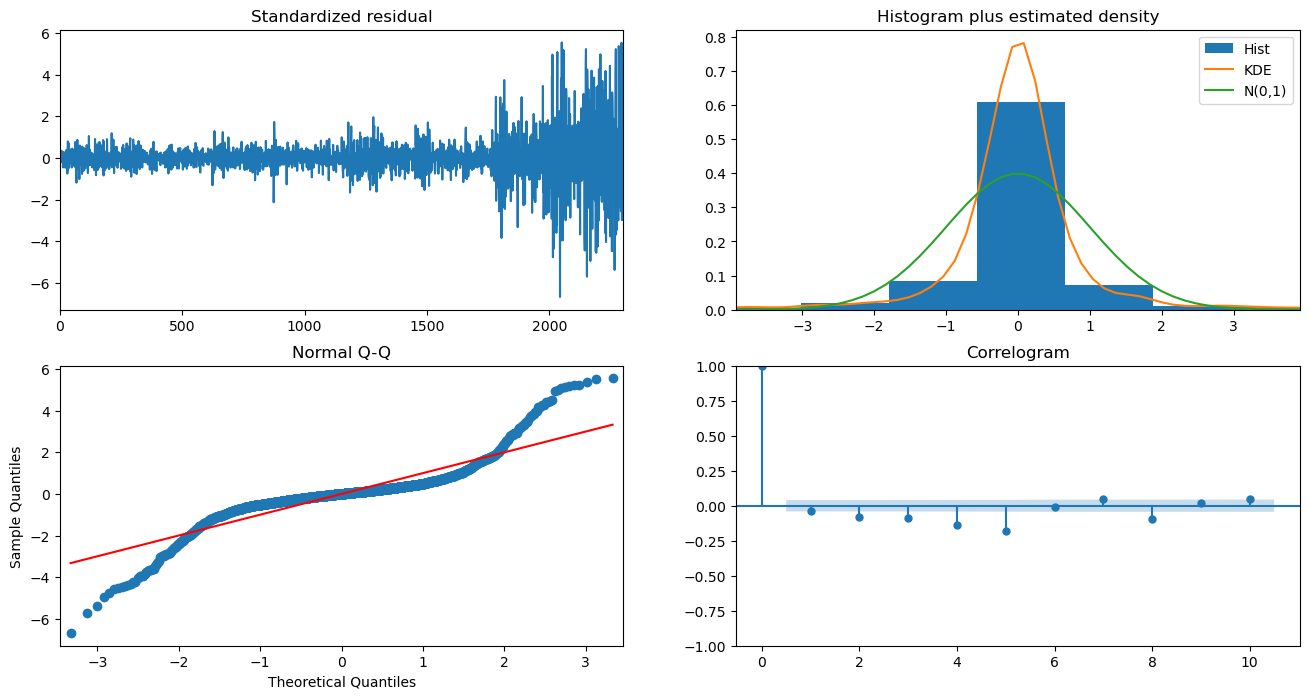

In [21]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

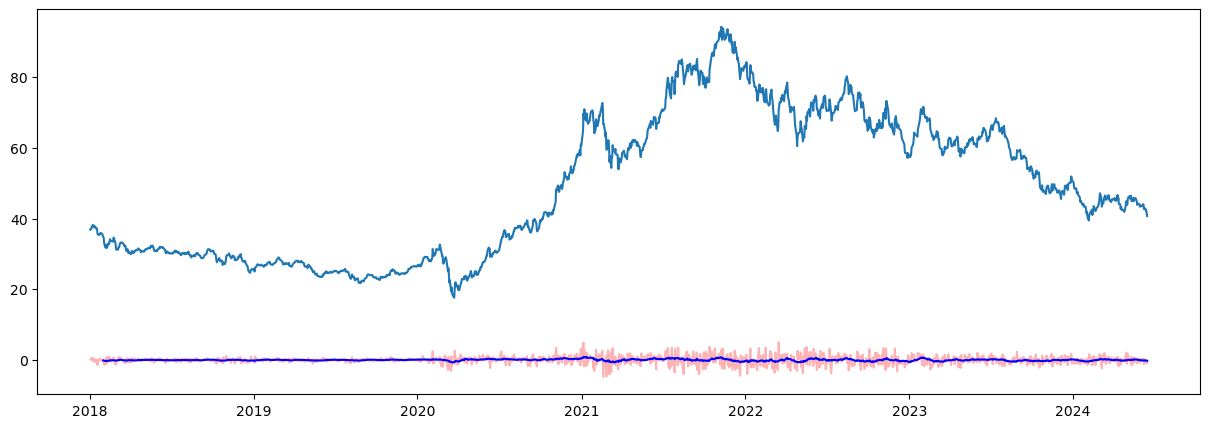

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# 차분 없이 원본 (비정상 시계열 데이터)
plt.plot(pre_l_df['2018':])

# 1차 차분을 사용했을 때 데이터의 정상성을 확보할 수 있으며 필요시 추가적인 차분을 통해 정상성의 비율을 높일 수 있습니다.
plt.plot(pre_l_df['2018':].diff().dropna(), c='red', alpha=0.3)
plt.plot(pre_l_df['2018':].diff().dropna().rolling(20).mean(), c='blue')
plt.show()



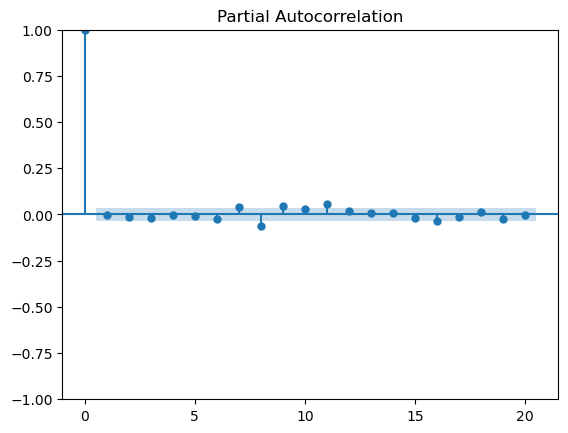

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 주식 데이터 프레임을 정상성있는 데이터 프레임으로 변경했기 때문에
# 부분자기상관함수를 사용하여 사분을 확인 (주식에 대한 데이터를 활용하기 때문에 서로 독립적인 데이터를 확인하는 \
# pacf를 사용)
plot_pacf(pre_l_df.diff().dropna(), lags=20)
plt.show()

In [24]:
pre_l_df

,Lithium
Date,
2013-01-02,25.6669
2013-01-03,25.5802
2013-01-04,25.6149
2013-01-07,25.6843
2013-01-08,25.4935
...,...
2024-06-10,42.8400
2024-06-11,42.3000
2024-06-12,42.3500


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


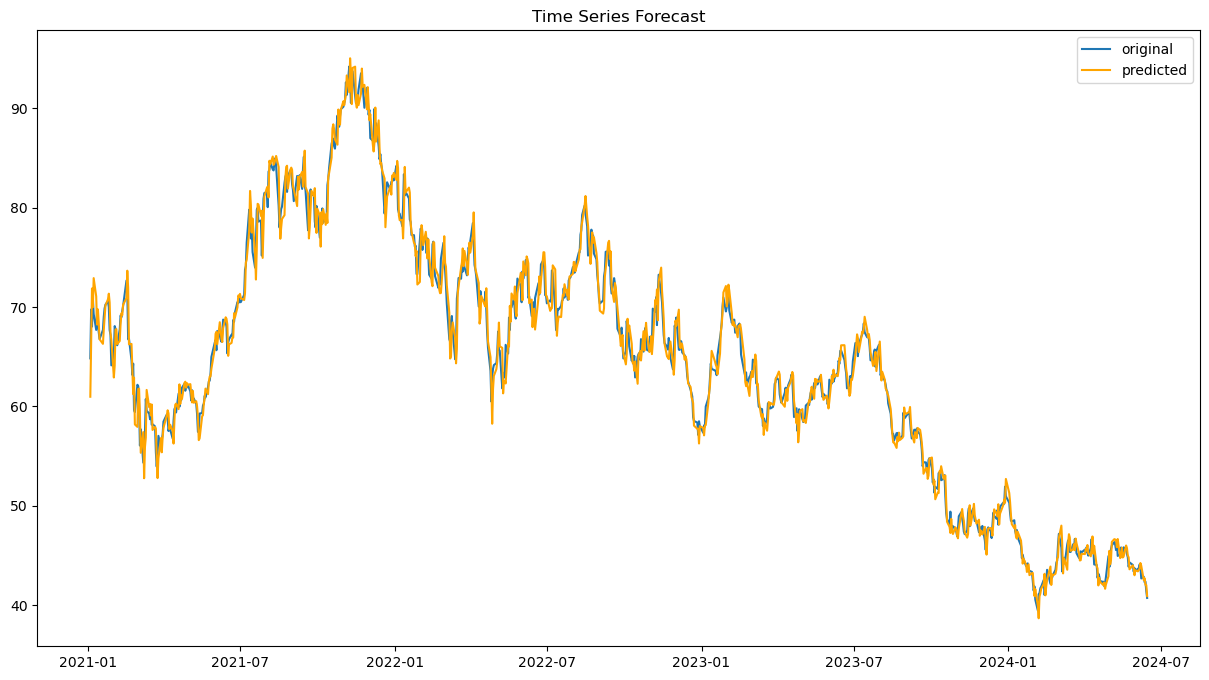

In [25]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(pre_l_df, order=(4, 2, 0))
model_fit = model.fit()

start_index = pd.to_datetime('2013-01-02')
end_index = pd.to_datetime('2024-06-14')

# 이 부분은 추가적인 예측이 아니라 기존 실제 데이터에서 모델 평가를 하는 부분
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))

# 실제 시계열 데이터
plt.plot(pre_l_df['2021':], label='original')
# model을 훈련시켜서 나온 결과에 대한 모델 검증
plt.plot(forecast['2021':], label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

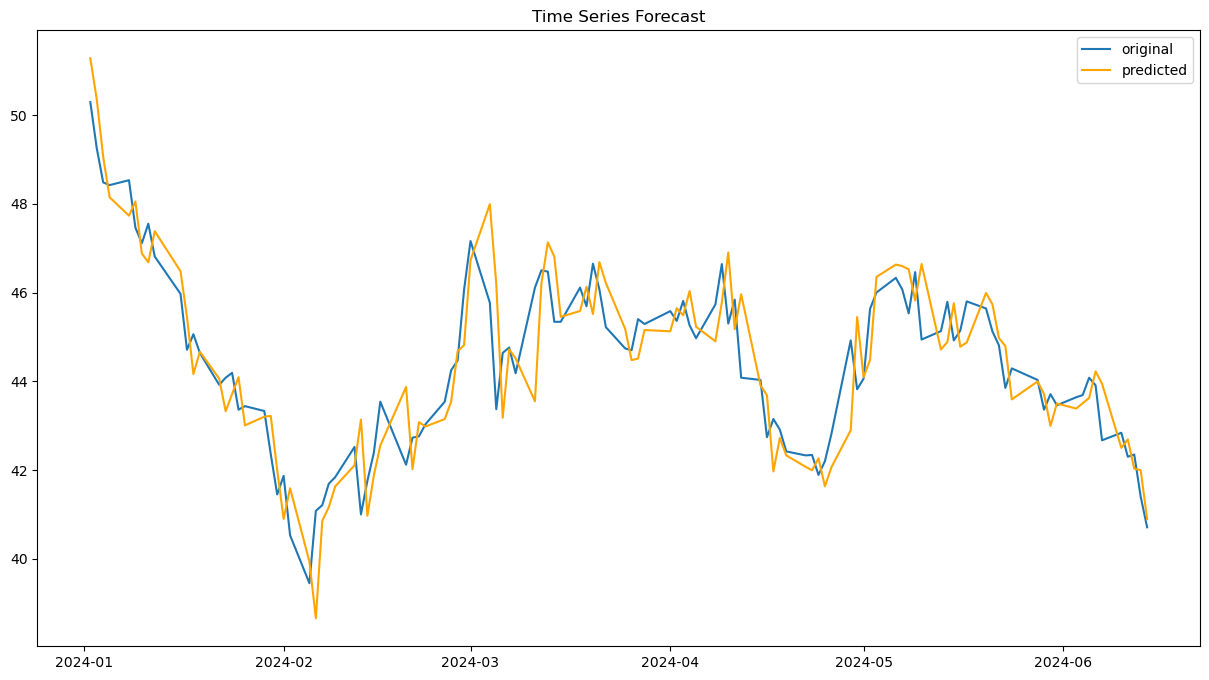

In [26]:
plt.figure(figsize=(15, 8))

# 실제 시계열 데이터
plt.plot(pre_l_df['2024':], label='original')
# model을 훈련시켜서 나온 결과에 대한 모델 검증
plt.plot(forecast['2024':], label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 예측 결과와 실제 값 사이의 평균 제곱 오차(MSE)를 계산합니다.
# MSE는 오차의 제곱 평균으로, 오차가 클수록 값이 커집니다.
mse = mean_squared_error(pre_l_df['2013-01-02':'2024-06-14'], forecast)
print("Mean Squared Error", mse)

# 평균 제곱 오차(MSE)에서 제곱근을 취해 루트 평균 제곱 오차(RMSE)를 계산합니다.
# RMSE는 MSE보다 해석하기 쉬운 값으로, 오차의 단위와 동일한 값을 가집니다.
mse = mean_squared_error(pre_l_df['2013-01-02':'2024-06-14'], forecast)
print("Root Mean Squared Error", mse ** (1/2))

# 예측 결과와 실제 값 사이의 평균 제곱 로그 오차(MSLE)를 계산합니다.
# MSLE는 로그 변환 후의 제곱 평균 오차로, 상대적인 오차를 측정합니다.
msle = mean_squared_log_error(pre_l_df['2013-01-02':'2024-06-14'], forecast)
print("Mean Squared Log Error", msle)


Mean Squared Error 1.1107774225377938
Root Mean Squared Error 1.0539342591157164
Mean Squared Log Error 0.004130090875107876


### 검증 상태가 매우 좋지 않은 것으로 보임

## prophet 모델을 사용하여 데이터 예측

In [28]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']
pre_l_df

,Lithium
Date,
2013-01-02,25.6669
2013-01-03,25.5802
2013-01-04,25.6149
2013-01-07,25.6843
2013-01-08,25.4935
...,...
2024-06-10,42.8400
2024-06-11,42.3000
2024-06-12,42.3500


In [29]:
pre_l_df = pre_l_df.reset_index()
pre_l_df

,Date,Lithium
0,2013-01-02,25.6669
1,2013-01-03,25.5802
2,2013-01-04,25.6149
3,2013-01-07,25.6843
4,2013-01-08,25.4935
...,...,...
2878,2024-06-10,42.8400
2879,2024-06-11,42.3000
2880,2024-06-12,42.3500
2881,2024-06-13,41.4000


In [30]:
# prophet 모델을 사용하기 위해 시계열 인덱스를 ds 라는 독립변수로 선언해줘야 한다.
pre_l_df = pre_l_df.rename(columns={'Date': 'ds'})
pre_l_df = pre_l_df.rename(columns={'Lithium': 'y'})
pre_l_df

,ds,y
0,2013-01-02,25.6669
1,2013-01-03,25.5802
2,2013-01-04,25.6149
3,2013-01-07,25.6843
4,2013-01-08,25.4935
...,...,...
2878,2024-06-10,42.8400
2879,2024-06-11,42.3000
2880,2024-06-12,42.3500
2881,2024-06-13,41.4000


In [31]:
from prophet import Prophet

model = Prophet().fit(pre_l_df)

12:48:44 - cmdstanpy - INFO - Chain [1] start processing
12:48:45 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][680:]

# 실제로 예측한 값이 정확하지 않을 수 있으며 그렇기 때문에 신뢰구간을 주의 깊게 봐야한다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


# 하이퍼파라미터 조정 전
# ds	         yhat       yhat_lower  yhat_upper
# 2025-06-10	28.172377	19.022245	37.473822
# 2025-06-11	28.129119	18.843484	37.439642
# 2025-06-12	28.057088	18.989997	36.936519
# 2025-06-13	27.957440	18.452153	36.387635
# 2025-06-14	28.790074	20.356262	37.769482

# 하이퍼파라미터 조정 후 (changepoint_prior_scale=10, seasonality_prior_scale = 10, seasonality_mode='multiplicative')
# 2025-06-10	30.816130	-3.913300	61.874685
# 2025-06-11	30.806281	-4.758745	61.096806
# 2025-06-12	30.752262	-4.033575	61.974986
# 2025-06-13	30.695912	-5.495878	63.240349
# 2025-06-14	-36.633879	-73.499092	5.248334


,ds,yhat,yhat_lower,yhat_upper
3243,2025-06-10,28.301458,19.362902,38.329952
3244,2025-06-11,28.258873,18.581783,38.378176
3245,2025-06-12,28.186693,19.409439,38.061199
3246,2025-06-13,28.087091,18.832081,38.152195
3247,2025-06-14,28.844605,19.638727,39.584339


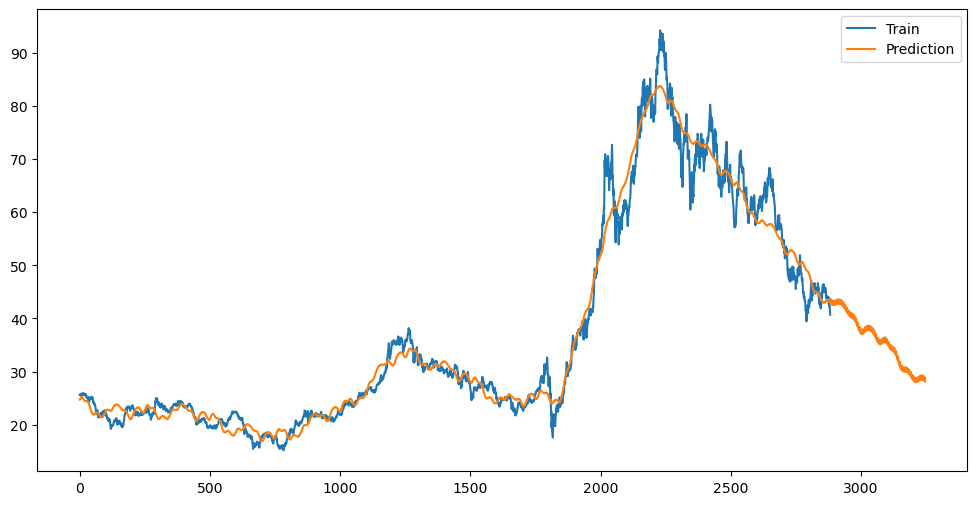

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_l_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


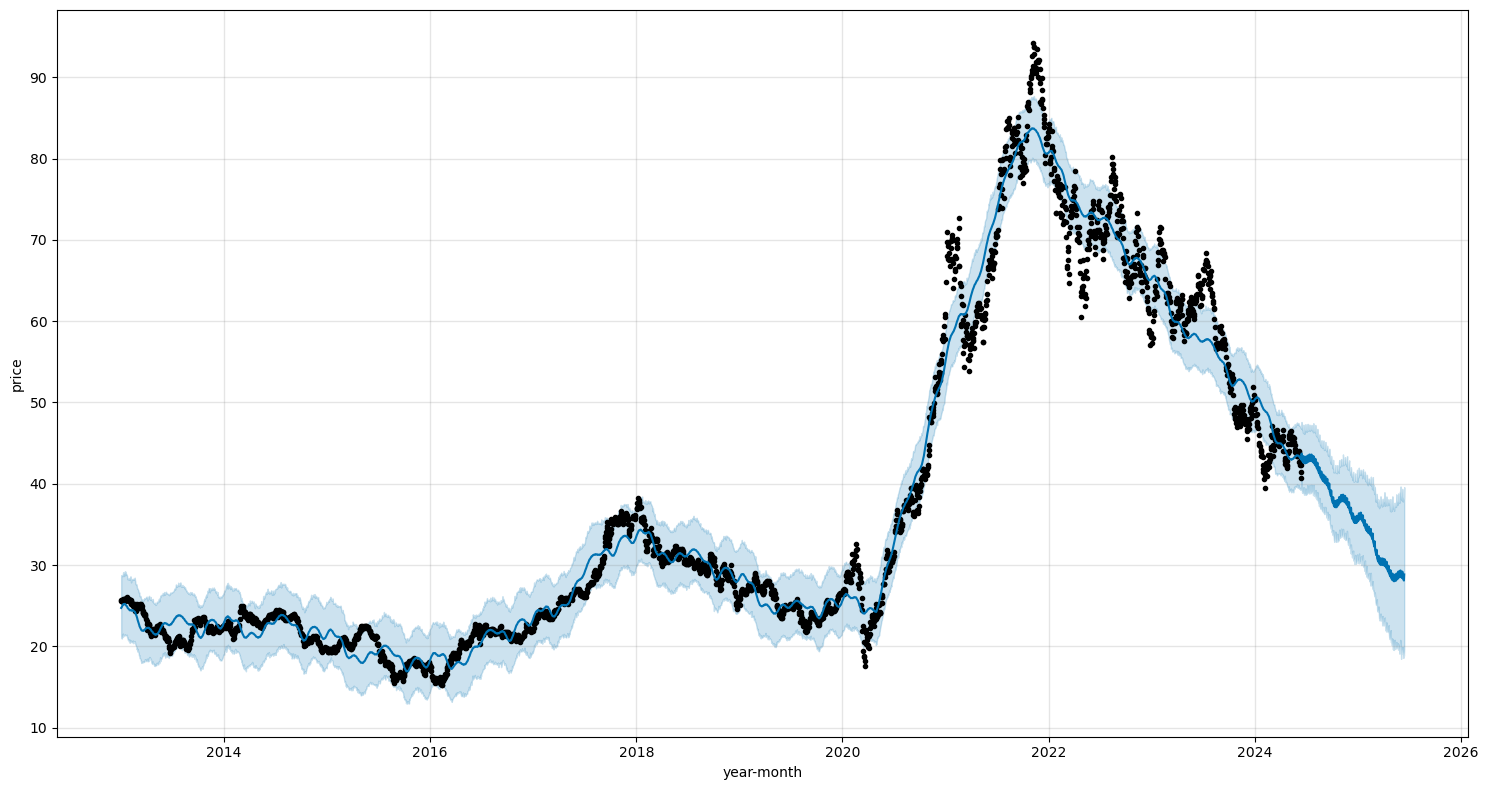

In [34]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

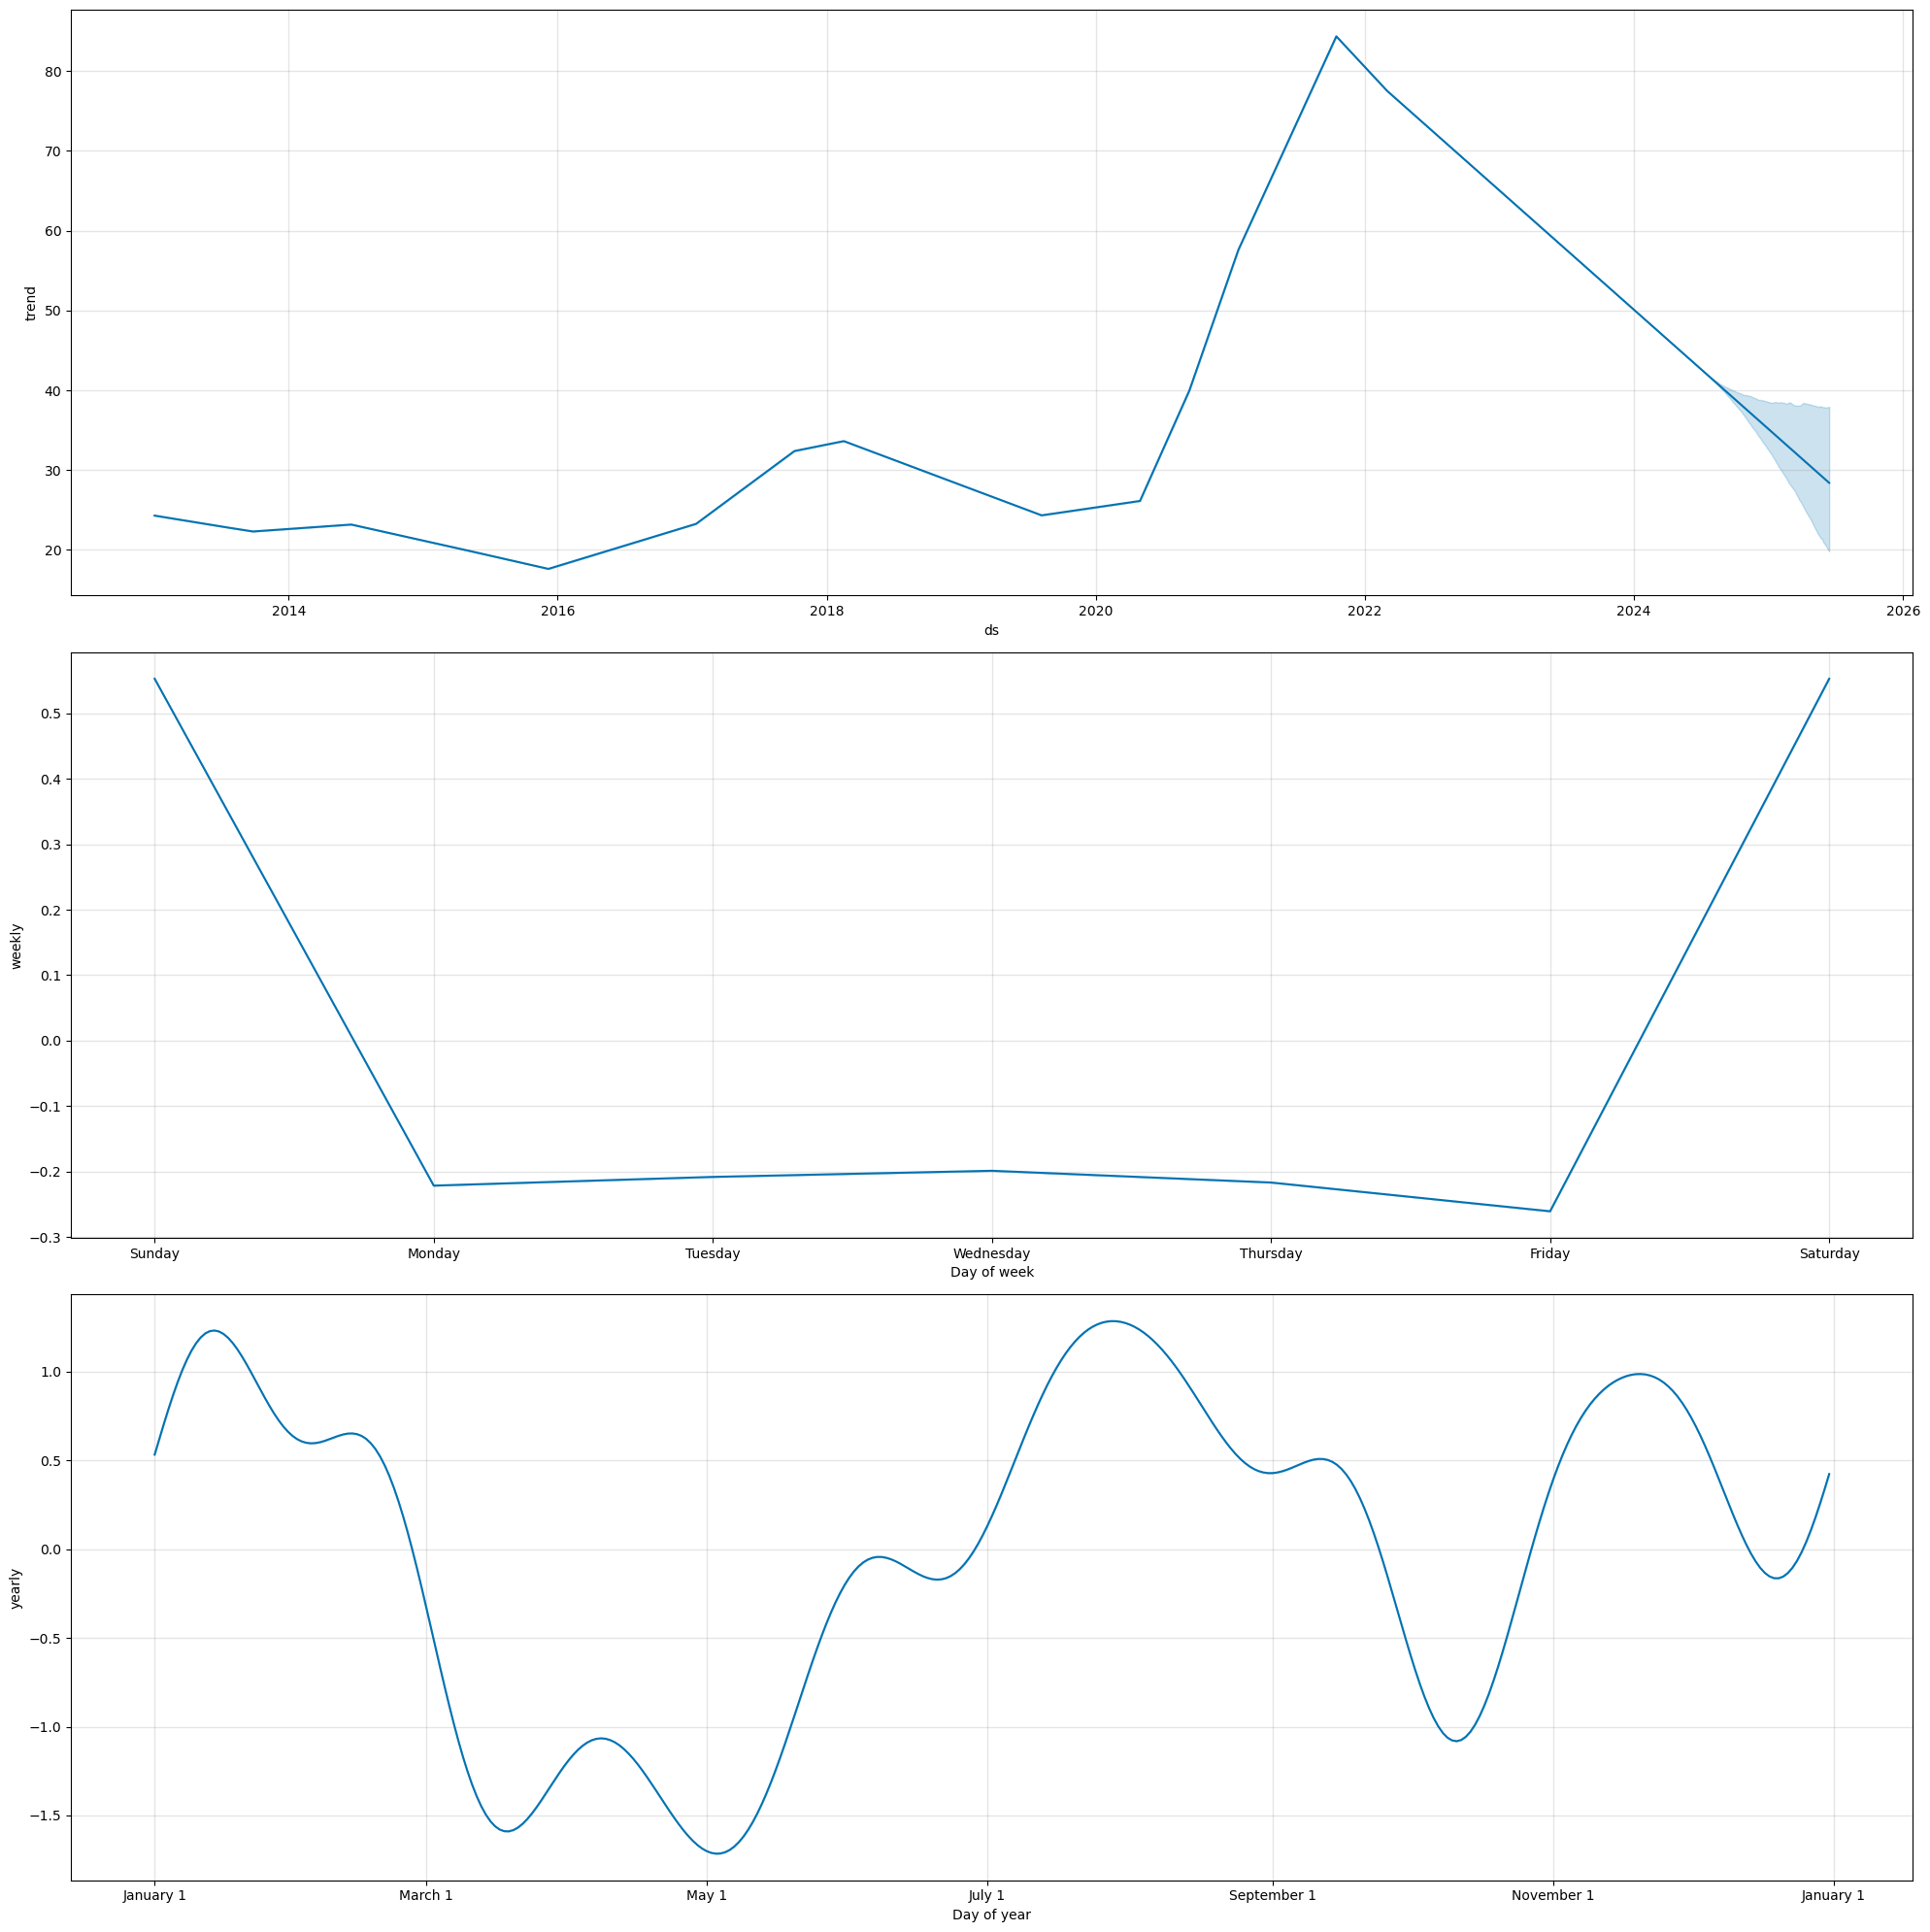

In [35]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

### Prophet 기본 모델에서 오차가 신뢰구간을 크게 벗어나는 부분이 확인되어 하이퍼파라미터를 조정하여 세부 조정을 진행해보려고 한다.

In [36]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_l_df) * 0.8)
test_len = int(len(pre_l_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_l_df.iloc[: train_len]
test_df = pre_l_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

12:48:46 - cmdstanpy - INFO - Chain [1] start processing
12:48:46 - cmdstanpy - INFO - Chain [1] done processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] start processing
12:48:48 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] start processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1] done processing
12:48:49 - cmdstanpy - INFO - Chain [1

In [37]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
45,10.00,1.00,multiplicative,0.446792
47,10.00,10.00,multiplicative,0.446847
43,10.00,0.10,multiplicative,0.446900
35,5.00,0.10,multiplicative,0.446910
37,5.00,1.00,multiplicative,0.446910
41,10.00,0.05,multiplicative,0.446923
23,0.50,10.00,multiplicative,0.446924
39,5.00,10.00,multiplicative,0.446930
33,5.00,0.05,multiplicative,0.446932
31,1.00,10.00,multiplicative,0.446953


In [38]:
# 최적의 하이퍼파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
model = Prophet(changepoint_prior_scale=10, 
                seasonality_prior_scale=10, 
                seasonality_mode='multiplicative')

model.fit(pre_l_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

12:57:35 - cmdstanpy - INFO - Chain [1] start processing
12:57:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2013-11-15,22.340254,19.511370,25.296669
222,2013-11-18,22.428122,19.335767,25.514980
223,2013-11-19,22.445821,19.512482,25.493574
224,2013-11-20,22.479314,19.648223,25.333784
225,2013-11-21,22.478672,19.515387,25.343119
...,...,...,...,...
3243,2025-06-10,30.786479,-3.221632,67.205912
3244,2025-06-11,30.776268,-2.353619,67.588540
3245,2025-06-12,30.721399,-2.843477,68.136729
3246,2025-06-13,30.665474,-3.422771,66.798611


In [39]:
# 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기위하여 인덱스 재정의 후 데이터 프레임 재선언
reset_l_df = pre_l_df.copy()
reset_l_df.set_index('ds', inplace=True)

# 예측 결과 데이터 프레임 생성
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

reset_l_df.index = pd.to_datetime(reset_l_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

In [40]:
# reset_l_df[['y']]
forecast_df
forecast_df[['yhat', 'yhat_lower', 'yhat_upper']].tail()

,yhat,yhat_lower,yhat_upper
ds,,,
2025-06-10,30.786479,-3.221632,67.205912
2025-06-11,30.776268,-2.353619,67.588540
2025-06-12,30.721399,-2.843477,68.136729
2025-06-13,30.665474,-3.422771,66.798611
2025-06-14,-31.588513,-68.494064,4.238239


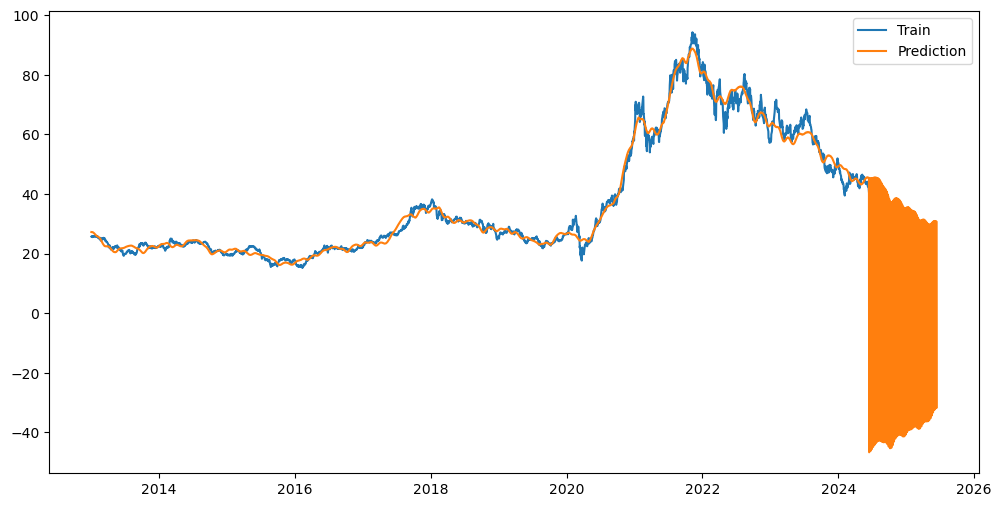

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


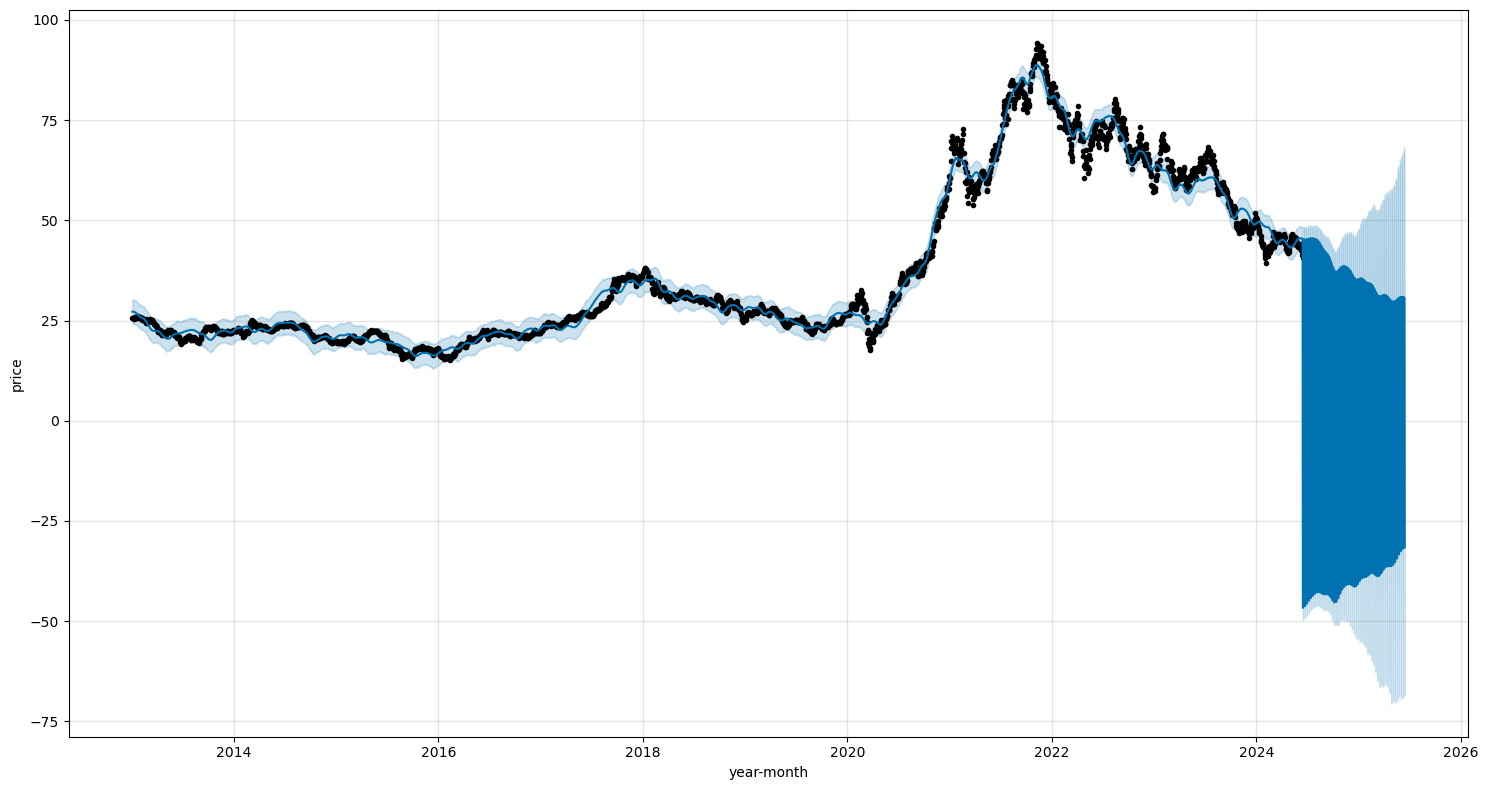

In [42]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

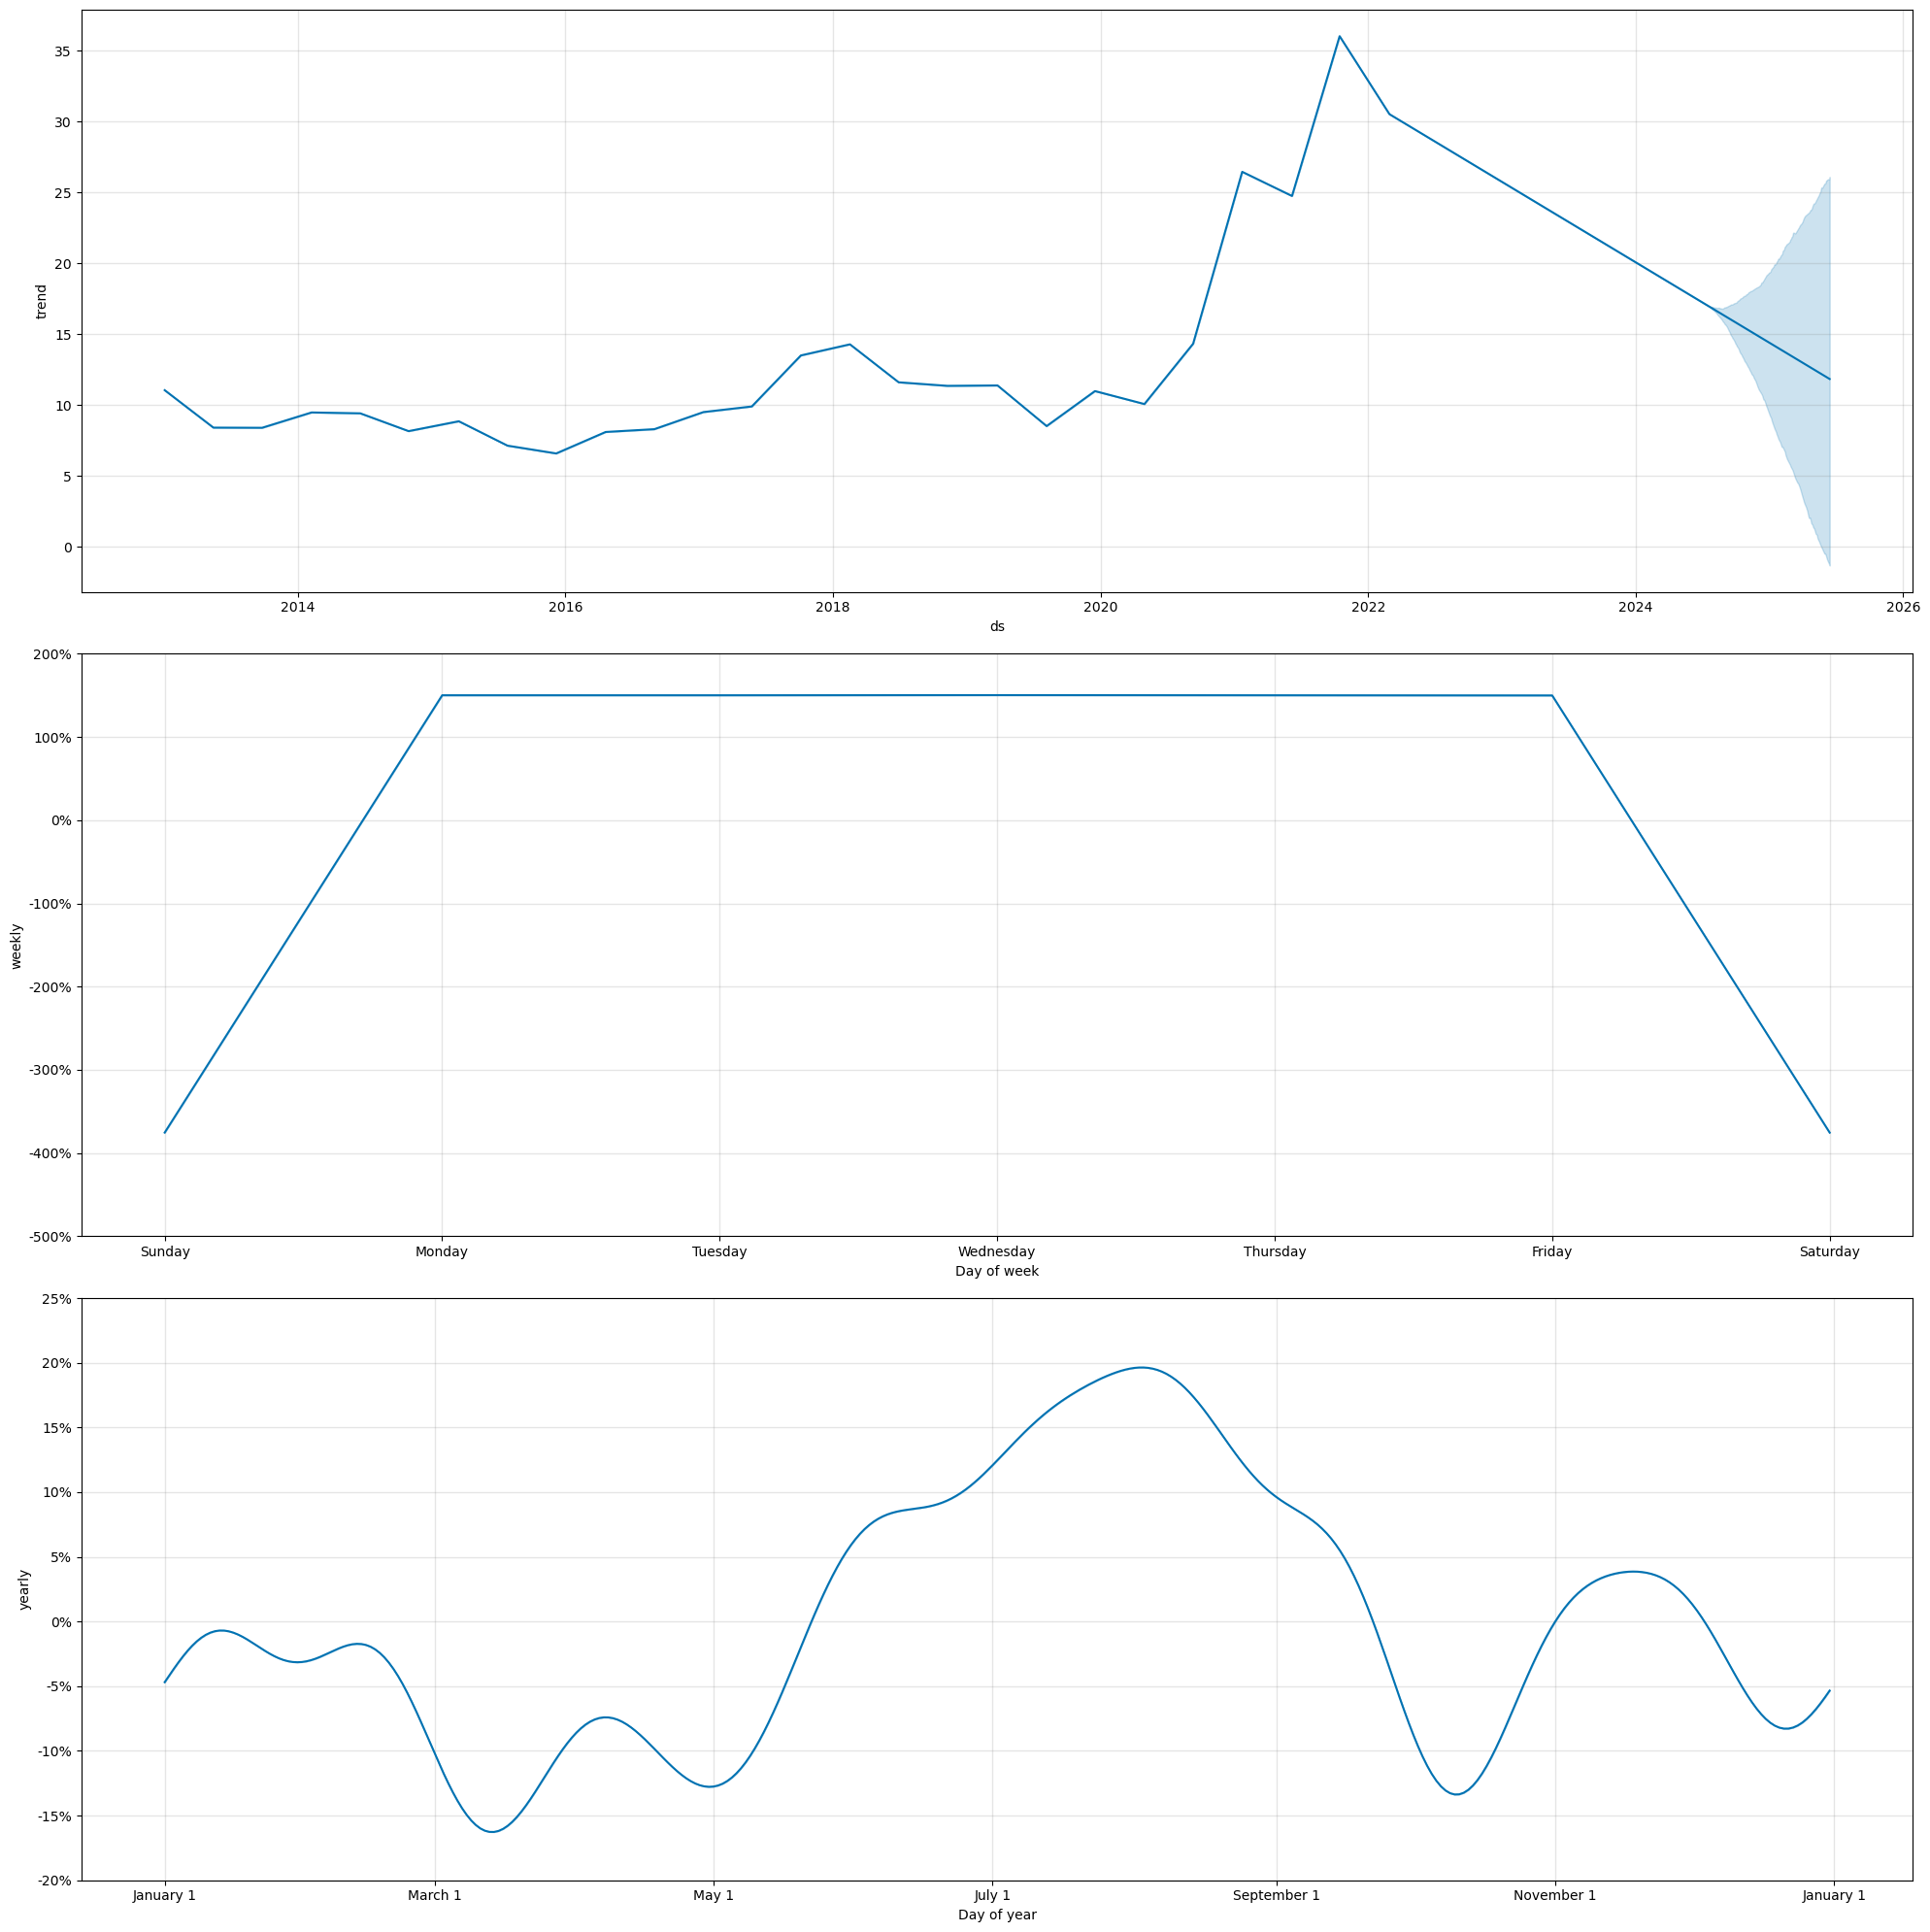

In [43]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

In [51]:
reset_l_df[['y']]['2024':]

,y
ds,
2024-01-02,50.29
2024-01-03,49.25
2024-01-04,48.48
2024-01-05,48.42
2024-01-08,48.53
...,...
2024-06-10,42.84
2024-06-11,42.30
2024-06-12,42.35


In [47]:
forecast_df[['yhat']]

,yhat
ds,
2013-01-02,27.202517
2013-01-03,27.190105
2013-01-04,27.175456
2013-01-07,27.191554
2013-01-08,27.176797
...,...
2025-06-10,30.786479
2025-06-11,30.776268
2025-06-12,30.721399


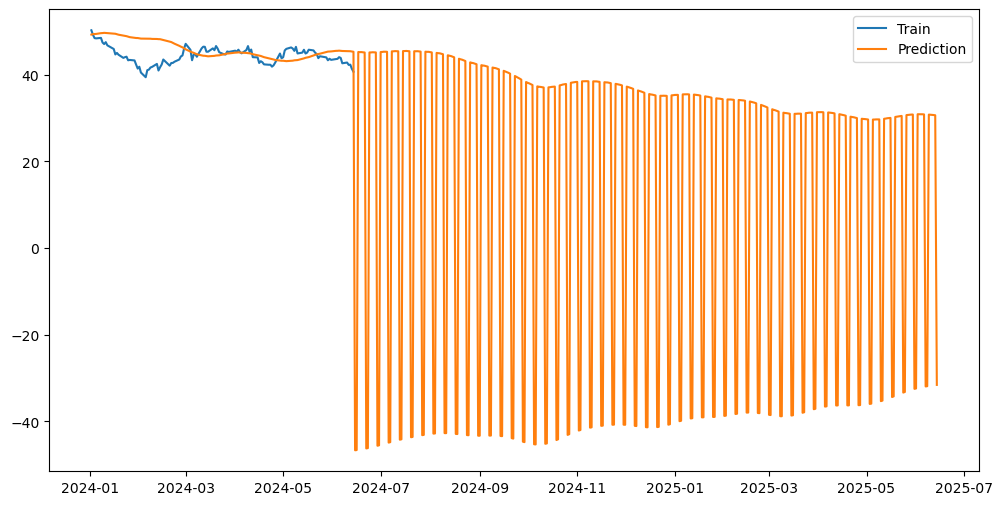

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df[['y']]['2024':], label='Train')
plt.plot(forecast_df[['yhat']]['2024':], label='Prediction')
plt.legend()
plt.show()

## 결과값에 로그를 취해 신뢰성을 높이고자 진행

In [56]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.

pre_l_df['y'] = np.log(pre_l_df['y'])  # 로그 변환

search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_l_df) * 0.8)
test_len = int(len(pre_l_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_l_df.iloc[: train_len]
test_df = pre_l_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

# 예측 결과 역변환
forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

13:09:12 - cmdstanpy - INFO - Chain [1] start processing
13:09:13 - cmdstanpy - INFO - Chain [1] done processing
13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:14 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] done processing
13:09:15 - cmdstanpy - INFO - Chain [1] done processing
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
13:09:16 - cmdstanpy - INFO - Chain [

In [63]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
35,5.00,0.10,multiplicative,0.167365
23,0.50,10.00,multiplicative,0.167407
21,0.50,1.00,multiplicative,0.167410
39,5.00,10.00,multiplicative,0.167410
45,10.00,1.00,multiplicative,0.167412
33,5.00,0.05,multiplicative,0.167421
31,1.00,10.00,multiplicative,0.167423
47,10.00,10.00,multiplicative,0.167426
41,10.00,0.05,multiplicative,0.167442
27,1.00,0.10,multiplicative,0.167443


In [64]:
# 최적의 하이퍼파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
model = Prophet(changepoint_prior_scale=5.0, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='multiplicative')

model.fit(pre_l_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

13:20:53 - cmdstanpy - INFO - Chain [1] start processing
13:20:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2013-11-15,3.098410,3.023036,3.166056
222,2013-11-18,3.100390,3.020376,3.170387
223,2013-11-19,3.101577,3.023281,3.172668
224,2013-11-20,3.101653,3.023049,3.176248
225,2013-11-21,3.101511,3.024997,3.176195
...,...,...,...,...
3243,2025-06-10,3.596014,2.779893,4.520734
3244,2025-06-11,3.595169,2.766419,4.485554
3245,2025-06-12,3.594070,2.773077,4.491925
3246,2025-06-13,3.592507,2.745265,4.497178


In [65]:
# 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기 위해 인덱스 재정의 후 데이터 프레임 재선언
reset_l_df = pre_l_df.copy()
reset_l_df.set_index('ds', inplace=True)

# 예측 결과 데이터 프레임 생성
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

reset_l_df.index = pd.to_datetime(reset_l_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)


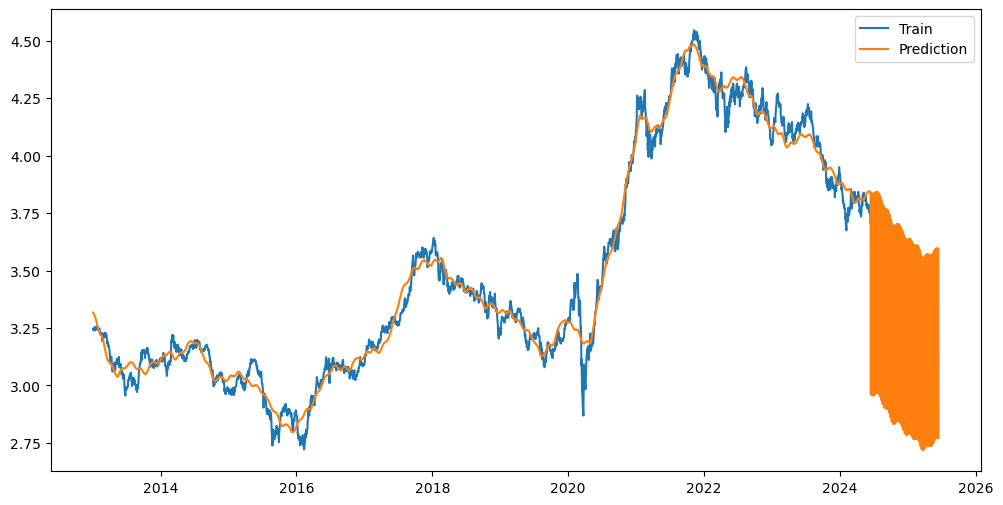

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df['y'], label='Train')
plt.plot(forecast_df['yhat'], label='Prediction')
plt.legend()
plt.show()


## 예측 구간을 조절하여 신뢰성을 높이고자 진행

In [80]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']
pre_l_df

,Lithium
Date,
2013-01-02,25.6669
2013-01-03,25.5802
2013-01-04,25.6149
2013-01-07,25.6843
2013-01-08,25.4935
...,...
2024-06-10,42.8400
2024-06-11,42.3000
2024-06-12,42.3500


## 2020 년 부터 훈련 진행.


In [81]:
pre_l_df = pre_l_df['2020':].reset_index()
pre_l_df


,Date,Lithium
0,2020-01-02,26.9073
1,2020-01-03,26.5382
2,2020-01-06,26.6548
3,2020-01-07,27.0142
4,2020-01-08,26.4508
...,...,...
1116,2024-06-10,42.8400
1117,2024-06-11,42.3000
1118,2024-06-12,42.3500
1119,2024-06-13,41.4000


In [83]:
# prophet 모델을 사용하기 위해 시계열 인덱스를 ds 라는 독립변수로 선언해줘야 한다.
pre_l_df = pre_l_df.rename(columns={'Date': 'ds'})
pre_l_df = pre_l_df.rename(columns={'Lithium': 'y'})
pre_l_df

,ds,y
0,2020-01-02,26.9073
1,2020-01-03,26.5382
2,2020-01-06,26.6548
3,2020-01-07,27.0142
4,2020-01-08,26.4508
...,...,...
1116,2024-06-10,42.8400
1117,2024-06-11,42.3000
1118,2024-06-12,42.3500
1119,2024-06-13,41.4000


In [84]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_l_df) * 0.8)
test_len = int(len(pre_l_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_l_df.iloc[: train_len]
test_df = pre_l_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

13:27:03 - cmdstanpy - INFO - Chain [1] start processing
13:27:03 - cmdstanpy - INFO - Chain [1] done processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] done processing
13:27:05 - cmdstanpy - INFO - Chain [1] done processing
13:27:05 - cmdstanpy - INFO - Chain [1] done processing
13:27:05 - cmdstanpy - INFO - Chain [1] done processing
13:27:05 - cmdstanpy - INFO - Chain [1] start processing
13:27:05 - cmdstanpy - INFO - Chain [1] done processing
13:27:05 - cmdstanpy - INFO - Chain [1] done processing
13:27:05 - cmdstanpy - INFO - Chain [1

In [85]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
4,0.05,1.00,additive,0.118776
2,0.05,0.10,additive,0.118864
8,0.10,0.05,additive,0.119666
12,0.10,1.00,additive,0.121244
0,0.05,0.05,additive,0.121344
10,0.10,0.10,additive,0.121642
6,0.05,10.00,additive,0.121764
14,0.10,10.00,additive,0.121839
9,0.10,0.05,multiplicative,0.151632
11,0.10,0.10,multiplicative,0.163940


In [95]:
# 최적의 하이퍼파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=1, 
                seasonality_mode='additive')

model.fit(pre_l_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

13:34:20 - cmdstanpy - INFO - Chain [1] start processing
13:34:20 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2020-11-16,51.101025,47.154949,55.033508
222,2020-11-17,51.345716,47.250570,55.345349
223,2020-11-18,51.612904,47.713944,55.612781
224,2020-11-19,51.783622,47.720274,55.770746
225,2020-11-20,51.936825,48.002803,55.887646
...,...,...,...,...
1481,2025-06-10,24.460543,-2.897214,49.999825
1482,2025-06-11,24.453494,-2.539832,50.136335
1483,2025-06-12,24.354640,-1.939525,49.996046
1484,2025-06-13,24.245425,-2.929673,49.978255


In [96]:
# 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기 위해 인덱스 재정의 후 데이터 프레임 재선언
reset_l_df = pre_l_df.copy()
reset_l_df.set_index('ds', inplace=True)

# 예측 결과 데이터 프레임 생성
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

reset_l_df.index = pd.to_datetime(reset_l_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)


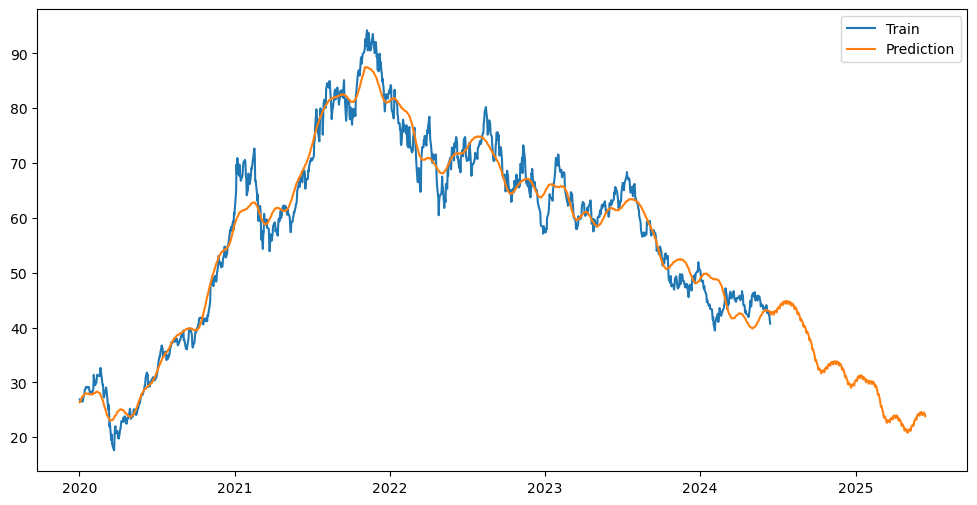

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df['y'], label='Train')
plt.plot(forecast_df['yhat'], label='Prediction')
plt.legend()
plt.show()


NameError: name 'reset_l_df' is not defined

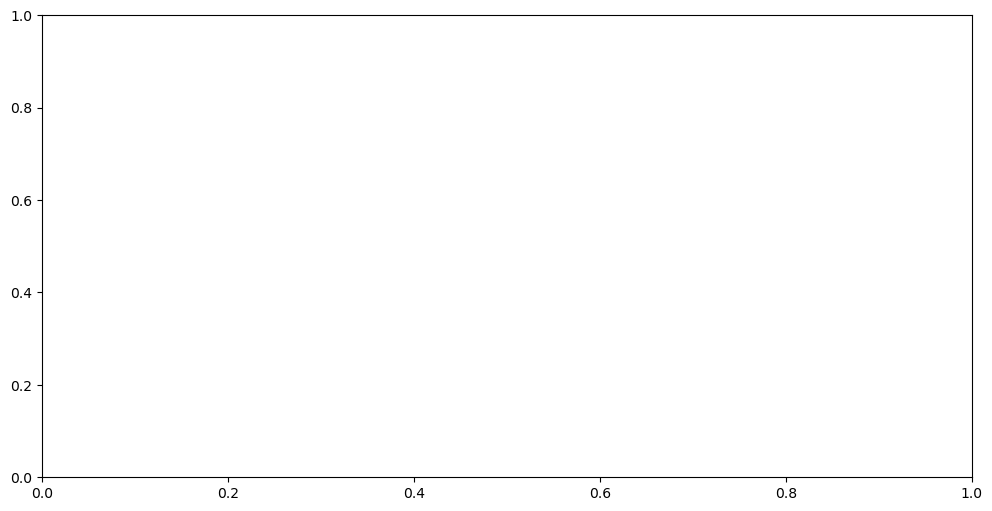

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df[['y']]['2024-01':], label='Train')
plt.plot(forecast_df[['yhat']]['2024-01':], label='Prediction')
plt.legend()
plt.show()

In [8]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

NameError: name 'model' is not defined

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# plt.plot(y_train.iloc[-50:], label='Train')
# plt.plot(y_test.iloc[-50:], label='Test')
# plt.plot(y_predict_df.pred, label='Prediction')
# plt.legend()
# plt.show()

In [ ]:
# import numpy as np

# def MAPE(y_test, y_pred):
#     return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')